In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import skew
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_data = 2

for i in range(2003, 2017):
    brooklyn = pd.read_csv("Data/" + str(i) + "/" + str(i) + "_brooklyn.csv")
    manhattan = pd.read_csv("Data/" + str(i) + "/" + str(i) + "_manhattan.csv")
    bronx = pd.read_csv("Data/" + str(i) + "/" + str(i) + "_bronx.csv")
    queens = pd.read_csv("Data/" + str(i) + "/" + str(i) + "_queens.csv")
    year = pd.concat([brooklyn, manhattan, bronx, queens])
    if i == 2003:
        all_data = year
    else:
        all_data = pd.concat([all_data, year])
    print(i)

/Users/tchen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2003


/Users/tchen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2004
2005


/Users/tchen/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016


In [3]:
neighborhoods = pd.read_csv("Data/neighborhoods.csv")
all_data = all_data.merge(neighborhoods, on = "NEIGHBORHOOD")

In [4]:
all_data = all_data.drop(['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'TAX CLASS AT PRESENT', 'BLOCK', 'TAX CLASS AT TIME OF SALE', 'LOT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'BUILDING CLASS AT TIME OF SALE', 'APARTMENT NUMBER', 'ZIP CODE'], axis=1)

In [5]:
all_data = all_data[all_data["GENTRIFICATION_ID"] != 0]
all_data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,GENTRIFICATION_ID
0,3.0,BATH BEACH,01 ONE FAMILY HOMES,"1,439","2,090",1901.0,$0,8/1/03,2.0
1,3.0,BATH BEACH,01 ONE FAMILY HOMES,"1,200","1,620",1926.0,"$450,000",1/24/03,2.0
2,3.0,BATH BEACH,01 ONE FAMILY HOMES,"1,473","1,656",1931.0,$0,10/8/03,2.0
3,3.0,BATH BEACH,01 ONE FAMILY HOMES,"1,473","1,656",1931.0,$0,4/2/03,2.0
4,3.0,BATH BEACH,01 ONE FAMILY HOMES,"1,473","1,656",1929.0,$0,4/2/03,2.0
5,3.0,BATH BEACH,01 ONE FAMILY HOMES,"4,833","2,300",1925.0,$0,9/5/03,2.0
6,3.0,BATH BEACH,01 ONE FAMILY HOMES,"1,571","1,456",1935.0,$0,5/12/03,2.0
7,3.0,BATH BEACH,01 ONE FAMILY HOMES,"2,417","2,106",1930.0,$0,4/29/03,2.0
8,3.0,BATH BEACH,01 ONE FAMILY HOMES,0,0,0.0,"$570,000",1/24/03,2.0
9,3.0,BATH BEACH,01 ONE FAMILY HOMES,"1,716","1,554",1920.0,"$320,000",2/27/03,2.0


In [6]:
all_data['LAND SQUARE FEET'] = all_data['LAND SQUARE FEET'].str.replace("[^0-9]", "")
all_data['GROSS SQUARE FEET'] = all_data['GROSS SQUARE FEET'].str.replace("[^0-9]", "")
all_data['SALE PRICE'] = all_data['SALE PRICE'].str.replace("[^0-9]", "")

In [7]:
all_data["LAND SQUARE FEET"] = pd.to_numeric(all_data["LAND SQUARE FEET"])
all_data["GROSS SQUARE FEET"] = pd.to_numeric(all_data["GROSS SQUARE FEET"])
all_data["SALE PRICE"] = pd.to_numeric(all_data["SALE PRICE"])

In [8]:
all_data = all_data[all_data["SALE PRICE"] != 0]

In [9]:
all_data

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,GENTRIFICATION_ID
1,3.0,BATH BEACH,01 ONE FAMILY HOMES,1200,1620,1926.0,450000,1/24/03,2.0
8,3.0,BATH BEACH,01 ONE FAMILY HOMES,0,0,0.0,570000,1/24/03,2.0
9,3.0,BATH BEACH,01 ONE FAMILY HOMES,1716,1554,1920.0,320000,2/27/03,2.0
10,3.0,BATH BEACH,01 ONE FAMILY HOMES,2417,2000,1935.0,427500,6/17/03,2.0
15,3.0,BATH BEACH,01 ONE FAMILY HOMES,1260,1908,1930.0,355000,7/21/03,2.0
18,3.0,BATH BEACH,01 ONE FAMILY HOMES,1000,1918,1920.0,3307131,11/20/03,2.0
21,3.0,BATH BEACH,01 ONE FAMILY HOMES,855,1462,1930.0,365000,5/21/03,2.0
22,3.0,BATH BEACH,01 ONE FAMILY HOMES,0,0,0.0,775000,4/9/03,2.0
23,3.0,BATH BEACH,01 ONE FAMILY HOMES,3867,1372,1910.0,500000,3/10/03,2.0
24,3.0,BATH BEACH,01 ONE FAMILY HOMES,2806,1156,1960.0,385000,9/24/03,2.0


In [10]:
for i in range(0, len(all_data.index)):
    temp = all_data.iloc[i, 7]
    temp = temp.split("/")
    all_data.iloc[i, 7] = (int(temp[2])) % 1000 * 10000 + int(temp[0]) * 100 + int(temp[1])

/Users/tchen/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [11]:
all_data["SALE DATE"] = all_data['SALE DATE'].astype(str).astype(np.int64)
all_data["GENTRIFICATION_ID"] = all_data["GENTRIFICATION_ID"].fillna(2)

/Users/tchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [12]:
data_smodel = all_data[all_data["GROSS SQUARE FEET"] != 0]
print(data_smodel.shape)
data_smodel = data_smodel.groupby(["NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "SALE DATE"])
data_stuff = data_smodel.mean()
data_stuff.iloc[4]

(125772, 9)


BOROUGH                  1.0
LAND SQUARE FEET      1400.0
GROSS SQUARE FEET     1839.0
YEAR BUILT            1901.0
SALE PRICE           20000.0
GENTRIFICATION_ID        1.0
Name: (ALPHABET CITY            , 01  ONE FAMILY HOMES                        , 81204), dtype: float64

In [13]:
survival_csv = open("Data/percentages.csv", "w")
survival_csv.write("duration,neighborhood,building_class_category,sale_price_increase,most_recent_year,gentrifying\n")

95

In [14]:
from datetime import date

def get_days(yearp, monthp, dayp, yearn, monthn, dayn):
    d0 = date(yearp, monthp, dayp)
    d1 = date(yearn, monthn, dayn)
    delta = d0 - d1
    return delta.days / 365.0

def get_price_increase(sqftp, pricep, sqftn, pricen):
    d0 = pricep / sqftp
    d1 = pricen / sqftn
    return (d1 - d0) / d0

In [15]:
for i in range(0, len(data_stuff.index) - 1):
    if (data_stuff.iloc[i].name[1] == data_stuff.iloc[i + 1].name[1]) & (data_stuff.iloc[i].name[0] == data_stuff.iloc[i + 1].name[0]):
        days_prev = int(data_stuff.iloc[i].name[2])
        days_next = int(data_stuff.iloc[i + 1].name[2])
        survival_csv.write(str(get_days(int(days_next / 10000), int(days_next / 100) % 100, days_next % 100, int(days_prev / 10000), int(days_prev / 100) % 100, days_prev % 100)) + "," + str(data_stuff.iloc[i].name[0]) + "," + str(data_stuff.iloc[i].name[1]) + "," + str(get_price_increase(data_stuff.iloc[i][2], data_stuff.iloc[i][3], data_stuff.iloc[i + 1][2], data_stuff.iloc[i + 1][3])) + "," + str(int(days_next / 10000)) + "," + str(data_stuff.iloc[i][5]) + "\n")

/Users/tchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':
/Users/tchen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':


In [17]:
survival_csv.close()

In [18]:
dataset = pd.read_csv("Data/percentages.csv")

In [19]:
def clean_data(df):
    numeric_vars = df.select_dtypes(['float64', 'int64']).columns
    data_numeric = df[numeric_vars]
    
    data_cat = df.select_dtypes(['object'])
    
    result_df = pd.concat([pd.get_dummies(data_cat),data_numeric], axis=1)
    return result_df.replace([np.inf, -np.inf, np.nan], 0).dropna(axis=0)

In [20]:
dataset1 = clean_data(dataset)

In [21]:
for i in range(0, len(dataset1.index)):
    if dataset1.iloc[i, 95] == 2:
        dataset1.iloc[i, 95] = 0

In [22]:
g_id = dataset1.gentrifying == 0
year = dataset1.most_recent_year > 14
dataset_test = dataset1[(g_id & year)]

In [23]:
dataset_train = dataset1[~dataset1.index.isin(dataset_test.index)]

In [24]:
dataset_test = dataset_test.drop(["most_recent_year", "gentrifying"], axis=1)
dataset_train = dataset_train.drop(["most_recent_year"], axis=1)

In [25]:
dataset1.shape

(96833, 96)

In [26]:
dataset_train.shape

(92675, 95)

In [27]:
dataset_test.shape

(4158, 94)

In [28]:
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(dataset_train, duration_col = 'duration', event_col = 'gentrifying')

/Users/tchen/anaconda3/lib/python3.6/site-packages/lifelines/fitters/coxph_fitter.py:327: RuntimeWarning: Column(s) ['building_class_category_11A CONDO-RENTALS                           ', 'building_class_category_34  THEATRES                                ', 'building_class_category_36  OUTDOOR RECREATIONAL FACILITIES         ', 'building_class_category_39  TRANSPORTATION FACILITIES               ', 'building_class_category_40  SELECTED GOVERNMENTAL FACILITIES        '] have very low variance. This may harm convergence. Try dropping this redundant column before fitting if convergence fails.
  warnings.warn(warning_text, RuntimeWarning)
/Users/tchen/anaconda3/lib/python3.6/site-packages/lifelines/fitters/coxph_fitter.py:339: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(inv(-self._hessian_).diagonal()) / self._norm_std


<lifelines.CoxPHFitter: fitted with 92675 observations, 25903 censored>

In [29]:
print(cph.hazards_)
print("---")
cph.print_summary()

      neighborhood_ALPHABET CITY              \
coef                                 13.8151   

      neighborhood_ASTORIA                    \
coef                               15.553172   

      neighborhood_BATH BEACH                 \
coef                               11.357176   

      neighborhood_BATHGATE                   \
coef                               14.144192   

      neighborhood_BEDFORD PARK/NORWOOD       \
coef                                11.45242   

      neighborhood_BEDFORD STUYVESANT         \
coef                               16.135934   

      neighborhood_BELMONT                    \
coef                               14.314624   

      neighborhood_BENSONHURST                \
coef                                11.51774   

      neighborhood_BRIGHTON BEACH             \
coef                               11.255508   

      neighborhood_BRONX PARK                        ...           \
coef                               12.557386         ...  

/Users/tchen/anaconda3/lib/python3.6/site-packages/lifelines/fitters/coxph_fitter.py:339: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(inv(-self._hessian_).diagonal()) / self._norm_std
/Users/tchen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/tchen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/tchen/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


Concordance = 0.830


In [30]:
x = cph.predict_partial_hazard(dataset_test)

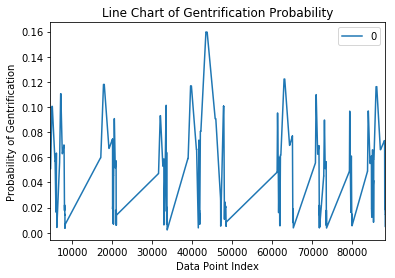

In [31]:
graph = x.plot()
plt.title("Line Chart of Gentrification Probability")
plt.ylabel("Probability of Gentrification")
plt.xlabel("Data Point Index")
plt.savefig("predictions.png")

In [32]:
x.shape

(4158, 1)

In [33]:
coefs = {}
start = x.index[0]
counter = 0

for i in x.index:
    n = dataset.iloc[i, 1]
    if n in coefs:
        coefs[n].append(x.iloc[counter, 0])
    else:
        coefs[n] = [x.iloc[counter, 0]]
    counter += 1

In [34]:
for i in coefs:
    summed = 0
    for j in coefs[i]:
        summed += j
    coefs[i] = summed / len(coefs[i])

In [35]:
coefs

{'BATH BEACH               ': 0.074197718305172258,
 'BEDFORD PARK/NORWOOD     ': 0.071969357082351762,
 'BENSONHURST              ': 0.086544175155772313,
 'BRIGHTON BEACH           ': 0.058768607312286475,
 'CASTLE HILL/UNIONPORT    ': 0.067936424166367859,
 'CONEY ISLAND             ': 0.047906240224915256,
 'CYPRESS HILLS            ': 0.08492941308944775,
 'EAST NEW YORK            ': 0.110330997609609,
 'FORDHAM                  ': 0.059254567941578157,
 'GRAVESEND                ': 0.087951058588037742,
 'HIGHBRIDGE/MORRIS HEIGHTS': 0.069778460878337056,
 'KINGSBRIDGE HTS/UNIV HTS ': 0.054894842848131051,
 'MOUNT HOPE/MOUNT EDEN    ': 0.053962765630353161,
 'PARKCHESTER              ': 0.067682971851799931,
 'SEAGATE                  ': 0.049278736892353604,
 'SOUNDVIEW                ': 0.084333329525489081}

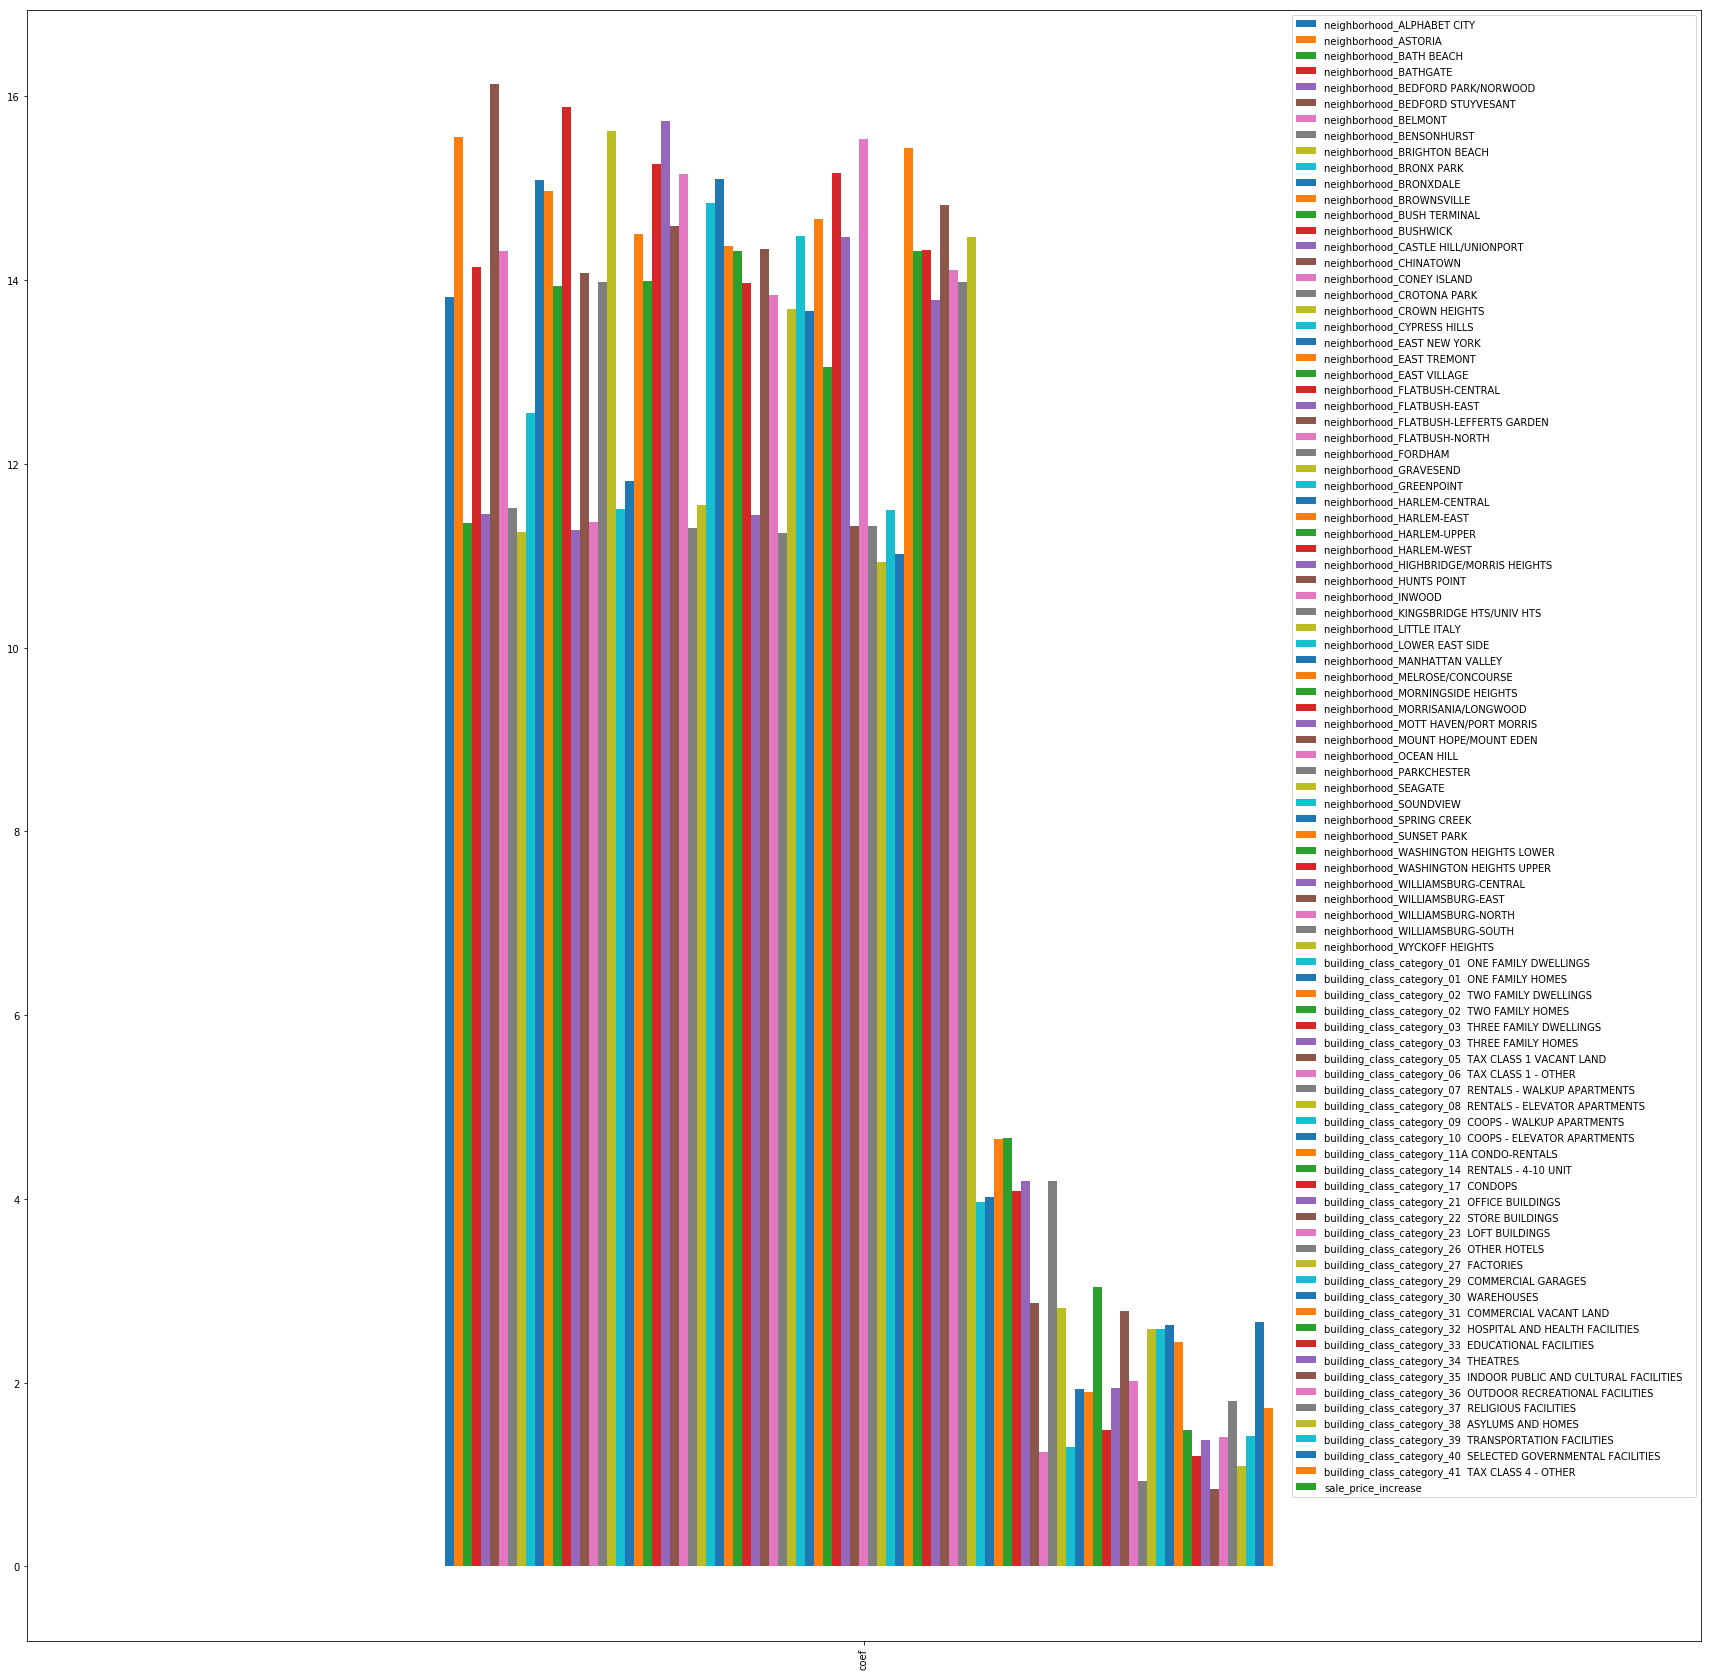

In [36]:
cph.hazards_.plot(kind = "bar", figsize = (30, 30))
plt.savefig("something.png")

In [37]:
y = list(coefs.values())
y.sort()
y.reverse()

In [38]:
labels = []

for i in y:
    for j in coefs:
        if coefs[j] == i:
            labels.append(j)
            continue

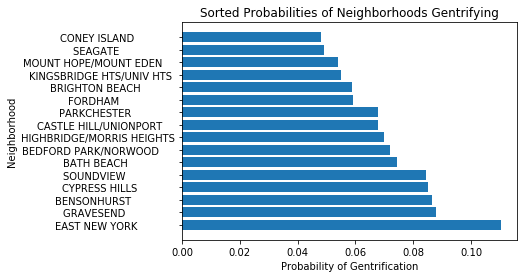

In [39]:
plt.barh(list(range(0, 16)), y)
plt.yticks(list(range(0, 16)), labels)
plt.ylabel("Neighborhood")
plt.xlabel("Probability of Gentrification")
plt.title("Sorted Probabilities of Neighborhoods Gentrifying")
plt.savefig("ltg.png")

In [40]:
for i in range(0, 93):
    print(cph.hazards_.iloc[0,i])

13.8150996554
15.553172467
11.3571763658
14.1441918151
11.45242047
16.1359342433
14.3146235683
11.5177396465
11.2555083814
12.5573855326
15.0896904195
14.9751037627
13.9391424565
15.8829844112
11.2807621557
14.0789005637
11.3657214297
13.9842280973
15.6230022619
11.5073955075
11.8190344178
14.5045532618
13.9893273428
15.267108954
15.7270430325
14.5852997547
15.1503271812
11.3037839293
11.5531285022
14.8411003162
15.104305705
14.3667255172
14.319465755
13.964819184
11.4463805346
14.3351563864
13.8433013436
11.2430738699
13.6818692612
14.4768688871
13.6603980735
14.6678431038
13.0527816494
15.1676528425
14.473520945
11.3190140047
15.5397305679
11.3201299481
10.9364130338
11.5022482374
11.0195351284
15.4341963202
14.3159827471
14.327828731
13.7791296653
14.8185114363
14.1055510538
13.9771018555
14.4716881909
3.96890767693
4.01603890395
4.65088254731
4.66535882757
4.08663056942
4.19114611277
2.86757466561
1.24208925811
4.18977728731
2.81742294281
1.29535942363
1.93568403411
1.90196963841
3

In [44]:
blah=x

pandas.core.frame.DataFrame

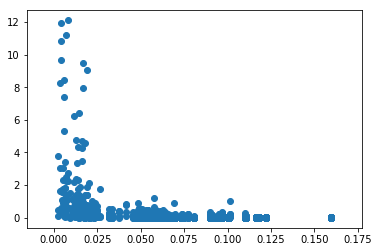

In [45]:
plt.scatter(x=blah, y=dataset_test["duration"])